<a href="https://colab.research.google.com/github/JTT94/neural_processes/blob/master/notebooks/np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta-Learning

In [0]:
from IPython.display import Image

import sys

!test -d neural_processes || git clone https://github.com/JTT94/neural_processes.git
if not 'neural_processes' in sys.path:
  sys.path.append('neural_processes')
  
from src.neuralprocesses import NeuralProcessParams, split_context_target
from src.neuralprocesses.network import encoder_h, decoder_g, xy_to_z_params
from src.neuralprocesses.process import init_neural_process
from src.neuralprocesses.predict import posterior_predict
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow as tf

Cloning into 'neural_processes'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 259 (delta 115), reused 184 (delta 66), pack-reused 0
Receiving objects: 100% (259/259), 30.50 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (115/115), done.


## Introduction

Neural networks (NN) are used to parameterise a single function (task) using a large number of training points. Due  to the often high-dimensionality of performant neural networks, it may take significant time and computation to train each NN for each task. This difficulty is exacerbated if there are many tasks as it can be impractical to train multiple similar networks. Meta-learning addresses this limitation by constructing procedures for "learning to learn", i.e. choosing the network training process so that it can perform well on multiple tasks and adapt quickly to learn new tasks. In this project we explored two approaches to meta-learning: Neural Processes (NPs) and the Model-Agnostic Meta-Learning (MAML) process. 

This report first details the theory behind the methods, then, details implementations of them on several examples, using different classes of functions. Performance is then explored. 

# Theory

## Neural Processes

### Neural Processes (NPs)

Neural Processes (NPs) can be viewed as a class of probabilistic models based on Neural Networks (NNs), which can represent distributions over stochastic processes. They combine the advantages of NNs, being computationally efficient, with those of Gaussian Processes (GPs), being data-efficient and flexible. The result can be seen as a prior over functions (or tasks). 

Given an observation set $O = \{(x_i, y_i)\}_{i=1}^n$, these are used to form a set of context points $C = \{(x_j, y_j), j = 1, ..., m\}$ and a set of target points $T = \{ (x^*_k, y^*_k), k = m+1, ..., n \}$. Given the context set and the $x^*_k$, the goal is to predict the function values $y^*_k$. Note that this differs from the usual split into training and test data, as both sets are used to train the NP. The (probabilistic) loss function is defined over the target set; the loss is computed and the NP is trained using back-propagation. 

NPs can be seen as a latent variable model which captures the hidden distributions among the task that we trained on. We denote these probabilistic latent representations by $z$ and their distribution by $p(z|x_{1:m}, y_{1:m})$. In practice this is unknown and is  approximated using Gaussian distribution for convenience, similar to variational autoencoders. 

The Neural Processes model and training procedure is well illustrated by the figure from [Kaspar Martens' tutorial on Neural Processes](https://kasparmartens.rbind.io/post/np/),

![](https://raw.githubusercontent.com/kasparmartens/NeuralProcesses/master/fig/schema2.png)

Starting from the first step of the algorthim, we have:

1. The context set $\{x_i, y_i\}_{i=1}^m$ is first mapped through the R-encoder $h$, usually a neural network, to obtain the latent representations $\{r_i\}_{i=1}^m$. 

2. These latent representations are then aggregated in a permutation invariant manner, usually done by taking averages, to produce a single vector $r$.

3. This $r$ is then passed to two other neural networks to produce the parameters $\mu_z$ and $\sigma_z$ of the approximated gaussian distribution of $z$.

4. Finally, we sample a $z$ from the distribution and concantanate it with the input target $x^{*}$. This is then passed to the decoder neural network $g$ to obtain a prediction of $y^*$.

The optimisation criterion for this layout is the evidencce lower-bound of posterior predictive density, 
$$
\log p(y^*_{m+1:n}|x_{1:m}, y_{1:m}) \geq \mathbb{E}_{q(z|x_{1:n}, y_{1:n})} \bigg[ \sum_{i=m+1}^n \log p(y_i|z, x_i) + \log \frac{q(z|x_{1:m}, y_{1:m})}{q(z|x_{1:n}, y_{1:n})}\bigg]
$$
which is an approximated version as we have no access to $p(z|x_{1:m}, y_{1:m})$.

Note that the parameters of $z$ are estimated using only the context points $\{x_i, y_i\}_{i=1}^m$, but the ELBO is calculated with respect to both the target and the context points.  At prediction time, samples are taken from $z \sim \mathcal{N}(\mu_z,\sigma_z^2)$ and passed through the decoder $g$ with the values of $x$ for which yo

-----------------------

### We will now demonstrate this idea on a simple 1-D regression case.

Let's first sample a single function from a GP with the following kernel,

$$
k(x, x') = \sigma\exp\big(-\frac{||x-x'||^2}{2l^2}\big)
$$

where we set the noise $\sigma$ and the lengthscale $l$ to be 1,



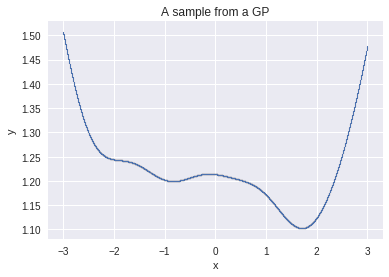

Picking different number of points from the function to run the NP alogorithm


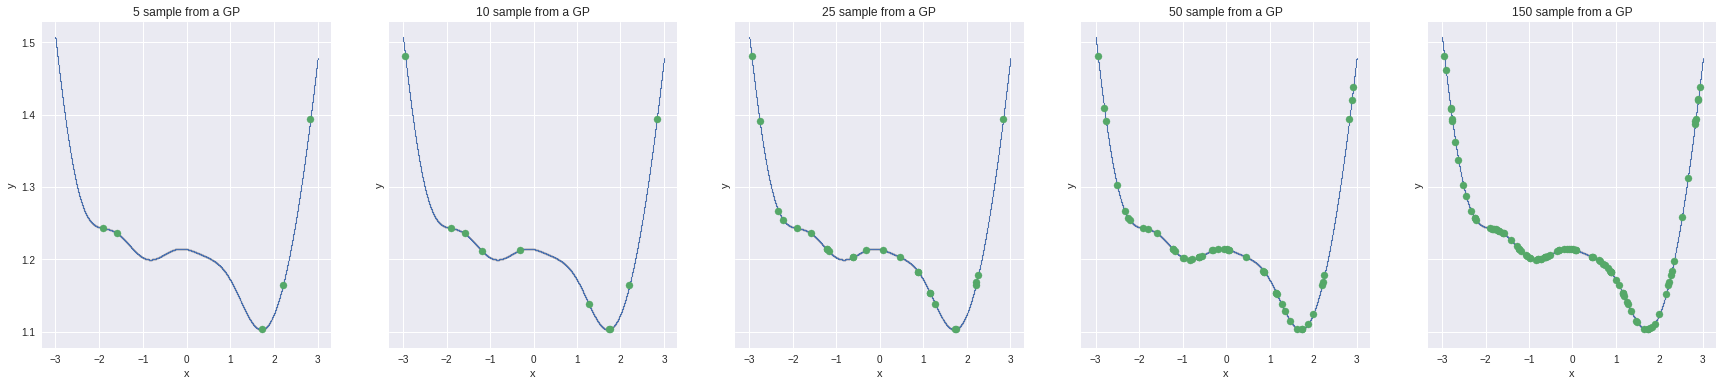

In [0]:
# Load the image
display(Image('../content/neural_processes/experiments/Alan/1sample_GP.png'))
print("Picking different number of points from the function to run the NP alogorithm")
display(Image('../content/neural_processes/experiments/Alan/context_points.png', width = 1200))


We will now run the NP algorithm to the above datasets. We will set both the dimension of $r$ and $z$ to be 1. From left to right, we see the progression of the algorithm against the number of iterations.  

For 5 data points


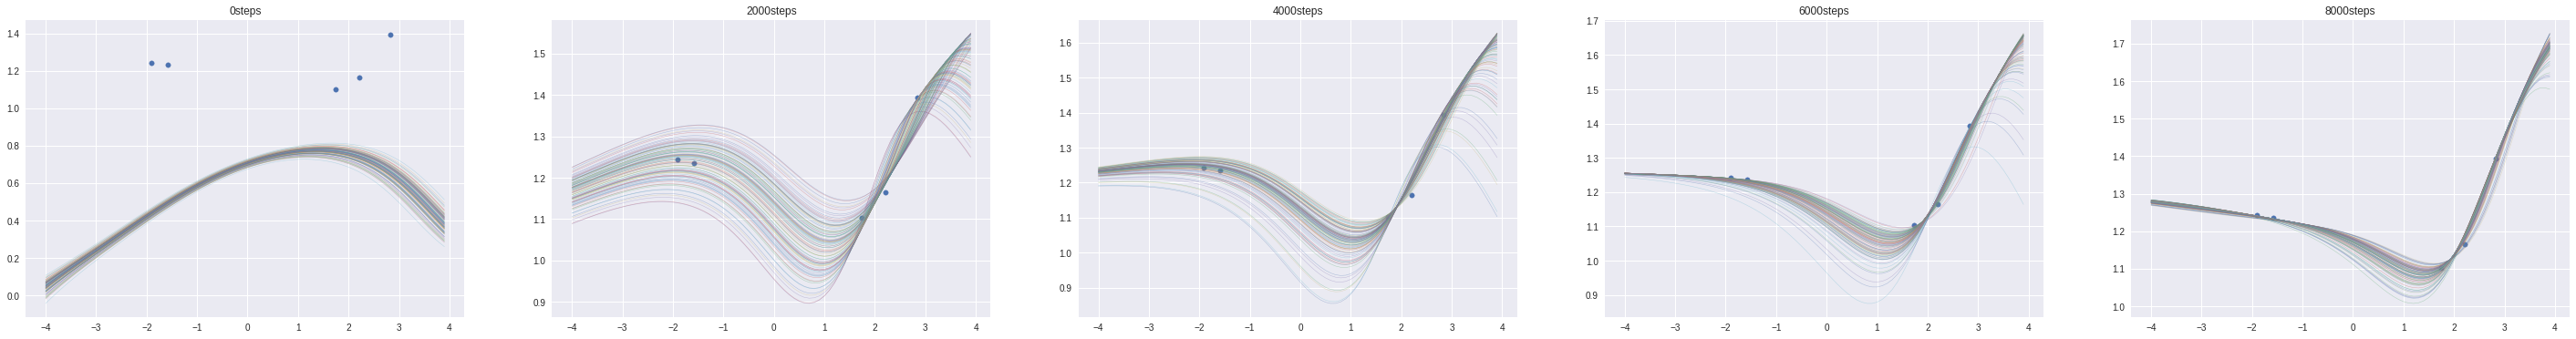

For 10 data points


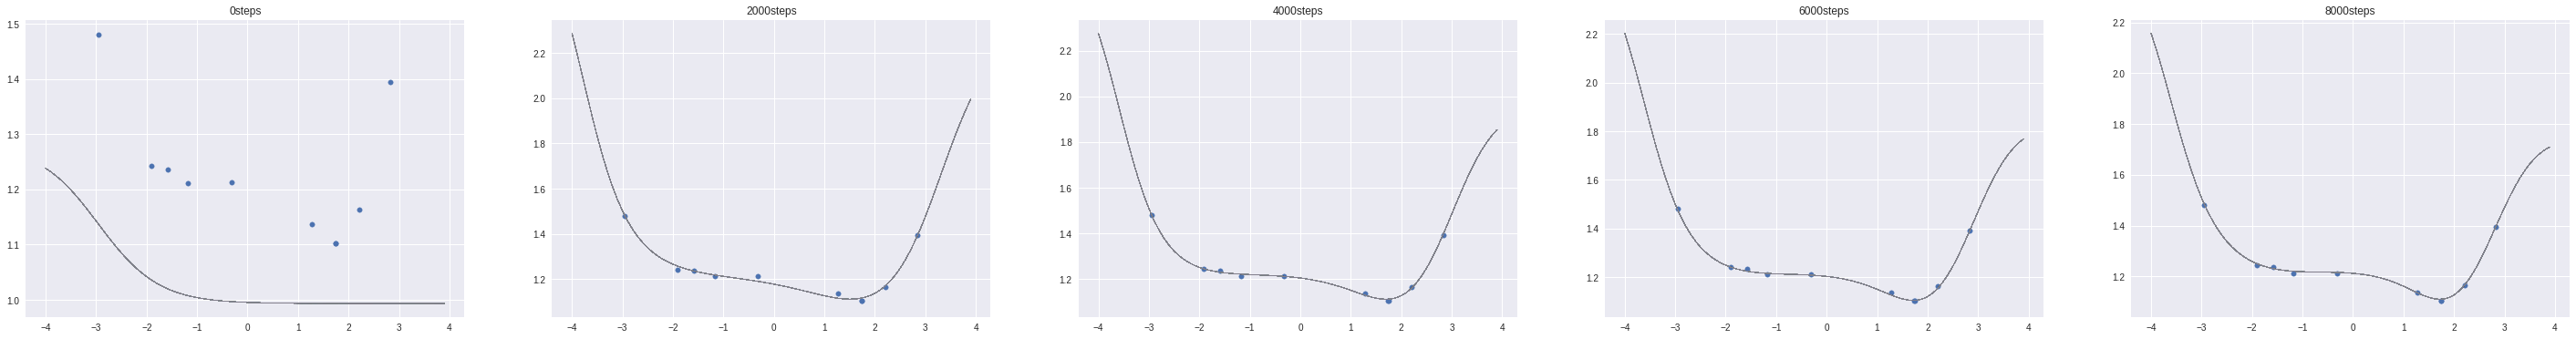

For 25 data points


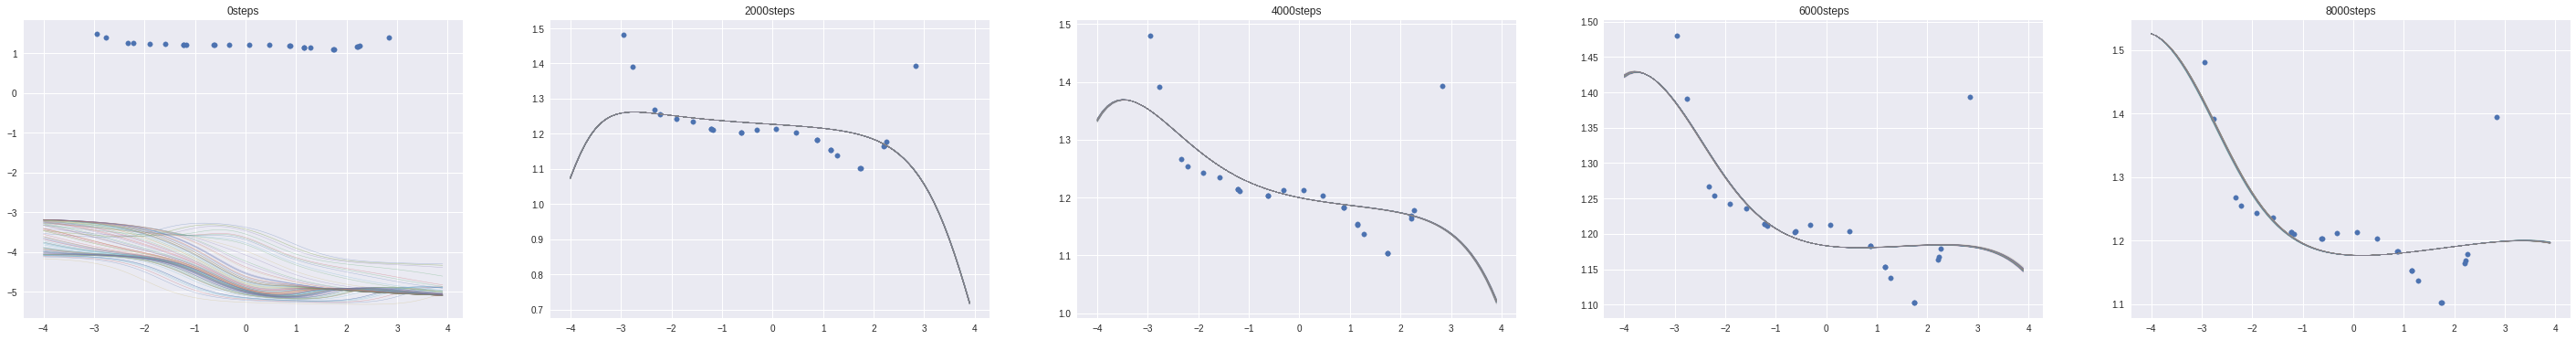

For 50 data points


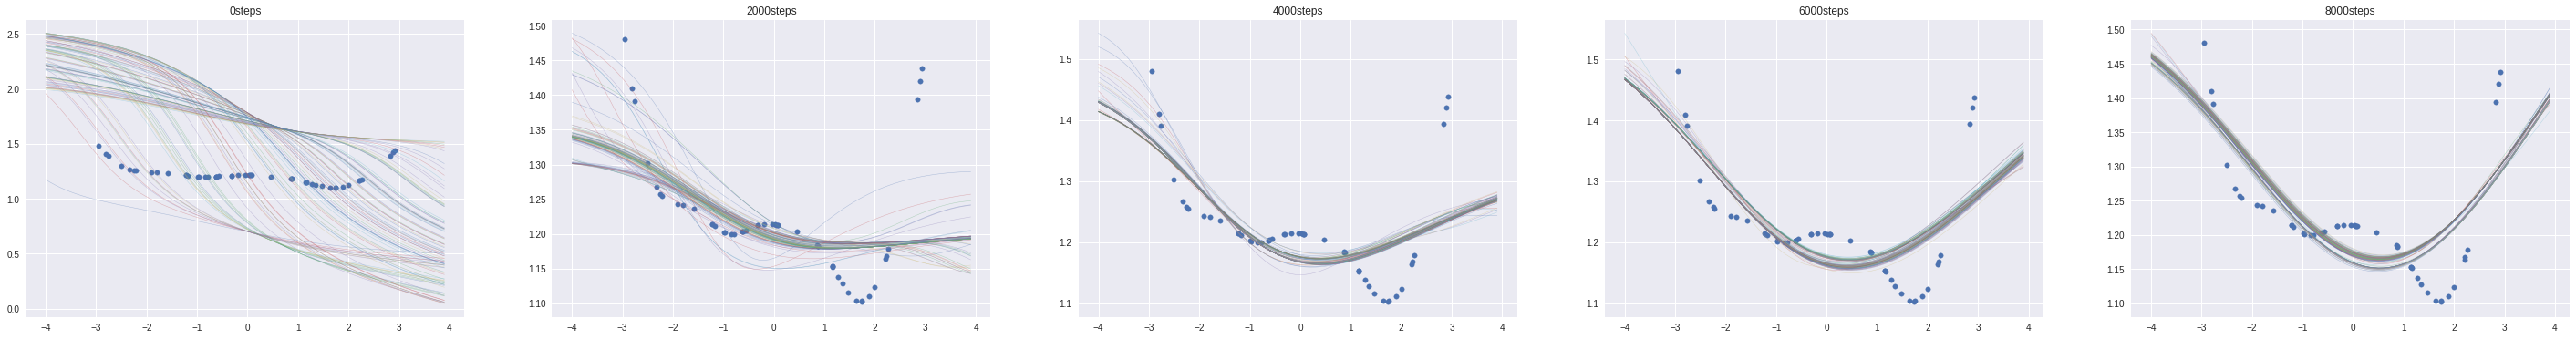

For 150 data points


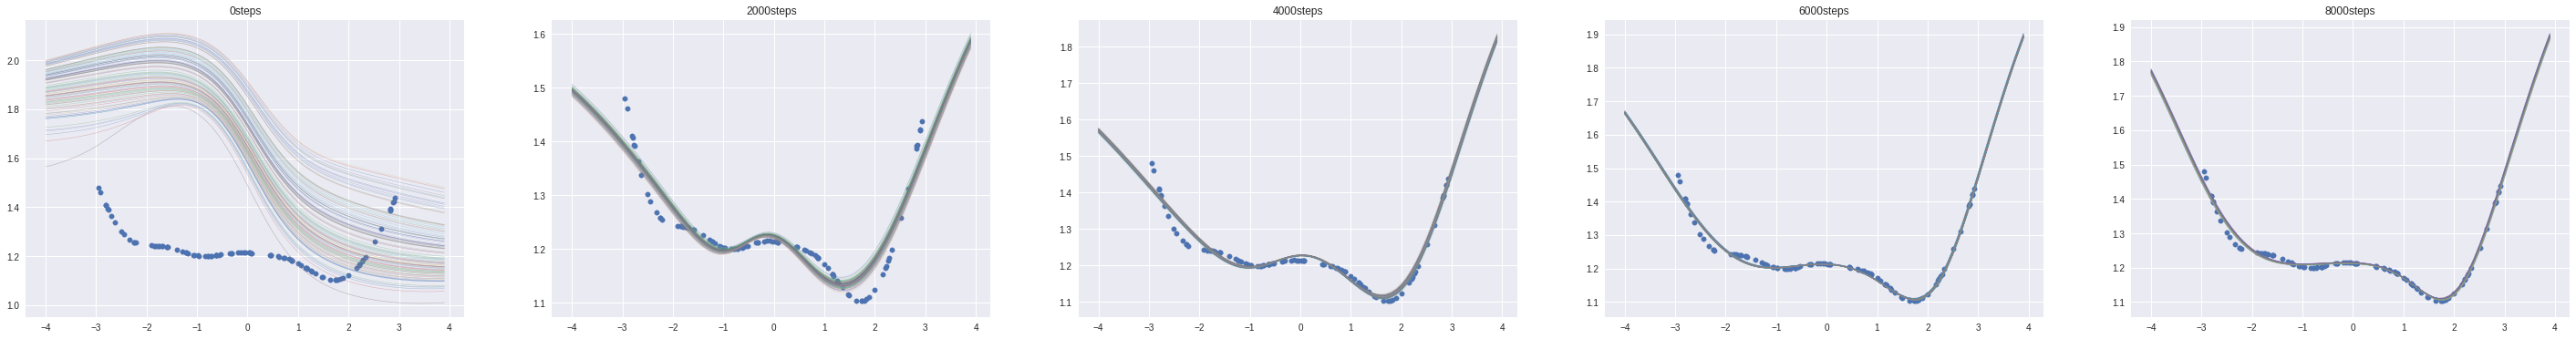

In [0]:
print("For 5 data points")
display(Image("../content/neural_processes/experiments/Alan/5 samples.png", width=1200, height=200))
print("For 10 data points")
display(Image("../content/neural_processes/experiments/Alan/10 samples.png", width=1200, height=200))
print("For 25 data points")
display(Image("../content/neural_processes/experiments/Alan/25.png", width=1200, height=200))
print("For 50 data points")
display(Image("../content/neural_processes/experiments/Alan/50 samples.png", width=1200, height=200))
print("For 150 data points")
display(Image("../content/neural_processes/experiments/Alan/150 samples.png", width=1200, height=200))


We some how the GP-alike samples behaved in the initial run and how they become more certain about the prediction when the iteration increases. 

### Conditional Neural Processes (CNPs)

Conditional Neural Processes (CNPs) are similar to NPs, but lack the stochastic global latent variable $z$; there is a deterministic connection between the context and target sets.

CNPs give a conditional distribution over functions $f \sim P$, given a set of observations. They are trained by taking a set $O$ of $n$ observations, and a random subset $O_N$ of N elements, $N \sim \text{Unif}(0, n-1)$. Then predictions of $O$ are made, based on $O_N$, and using gradient steps the conditional likelihood of the targets given $O_N$ is maximised. 

The architecture of CNPs is similar to that of NPs:

1. The observation set $O$ is first mapped through the R-encoder $h$, usually a neural network, to obtain the latent representations $\{r_i\}_{i=1}^n$. 

2. These latent representations are then aggregated in a permutation invariant manner, usually done by taking averages, to produce a single vector $r$.

3. $r$ and  $x^*$ are then passed to the decoder neural network $g$ to obtain predictions of $y^*$.

The presence of $z$ in NPs means that it captures the global uncertainty, and is possible to sample globally from the model, i.e. one function $f$ at a time. With CNPs, due to the lack of this global variable, we sample one value $y_i$ at a time independently from the other $y_t$'s. Thus they disregard the covariance between target points, and cannot generate consistent samples.

###Attentive Neural Processes (ANPs)

Neural process is quick and easy to implement, but in practice it suffers from underfitting. [Hyunjik et al. (2019)][1] hypothesized that the underfitting is due to the mean-aggregation step in the encoder acts as a bottleneck: because takinng the mean across context representations gives the same weight to each context point, which means we lack the knowledge of similarity among the context points and the target points. 

Following this hypothesis,  [Hyunjik et al. (2019)][1] introduced the attentive neural processes where now the datapoints are "attentive" to their surrounding similar to how in GP regression, predictions are made closely based on similarity induces by the kernel functions. 

#### Attention
Given a set of key-value pairs $(k_i, v_i)_{i\in\mathcal{I}}$ and a query $q$, an attention mechainsm outputs a weighted version of sum of the values, where the weights are always some similarity measure between the query $q$ and each keys we have.

Below are some attention mechanism one could apply:

* **Uniform** $((k_i,v_i)_{i\in I}, q)= \frac{1}{|I|} \sum_i v_i$

* **Laplace** $((k_i,v_i)_{i\in I}, q)= \sum_i w_i v_i, \hspace{2mm} w_i \propto \exp(-\frac{||q - k_i||_1}{l})$

* **DotProduct** $((k_i,v_i)_{i\in I}, q)= \sum_i w_i v_i, \hspace{2mm} w_i \propto \exp(q^\top k_i / \sqrt{d_k})$ where $k_i \in \mathbb{R}^{d_k}$.

* **Multihead** $((k_i,v_i)_{i\in I}, q)= \mathcal{L}^O(\text{concat}(\text{head}_1, \ldots, \text{head}_H))$, $\text{head}_h = \text{DotProduct}((\mathcal{L}^K_h(k_i),\mathcal{L}^V_h(v_i))_{i \in I}, \mathcal{L}^Q_h(q))$ 

  where $\mathcal{L}$ are linear maps with trainable parameters.



[1]:(https://arxiv.org/abs/1901.05761)

##Model-Agnostic Meta-Learning (MAML)

The motivation behind the MAML procedure is to pre-train models that are then able to quickly adapt to new problem settings. MAML aspires to be general, in that it does not depend on the model architecture, only that the model may be trained via a gradient descent. 

MAML directly uses tasks $\mathcal{T}_i \sim P$ in the training process, each task can be viewed as a function. These functions can be partially observed as input and response datasets: $\mathcal{D}_i = \{x_i,y_i\}$. In some ways MAML is similar to techniques such as pre-training embedders, often used in natual language processing. However, rather than being augmented with additional parameters for specific, as is common woth pre-trained embedders, MAML does not require additional parameters, and is trained directly on the tasks intended, therefore likely exhibit quicker fine-tuning. 

Suppose the parameters of a model $\theta$ are contained in some space $\Theta$.  Essentially MAML uses a specific loss function to navigate $\Theta$ via gradient descent. The specific loss function aims to navigate parameters $\theta$, in the training procedure, to a location in $\Theta$ that is performant for many tasks and can be quickly adapted to many tasks.


![](https://raw.githubusercontent.com/JTT94/neural_processes/master/docs/maml_diagram.PNG)

It is assumed each individual task has a known loss function. During training,  for each task in a batch of tasks, the parameters are updated using task level losses and gradient descent, and the corresponding observed data from the task, $\mathcal{D}_i = \{x_i,y_i\}$. The outputs are a batch of locally updated parameters, denoted $\theta_i^*$ in the diagram.  The global loss is then defined as the sum of the task level losses, each task level loss evaluated at the corresponding locally updated parameter and newly sampled data $\mathcal{D}'_i = \{x_i,y_i\}$ corresponding to each of the tasks. A global gradient descent step is then performed. This is fully detailed in the diagram below:
![](https://raw.githubusercontent.com/JTT94/neural_processes/master/docs/maml_algorithm2.PNG)


# Experiments

### Sine waves

In [0]:
#@title Train on Sine Data Generator

tf.reset_default_graph()
params = NeuralProcessParams(dim_r=2, dim_z=2, n_hidden_units_h=[8], n_hidden_units_g=[32, 32, 32])
sess = tf.Session()

# Placeholders for training inputs
x_context = tf.placeholder(tf.float32, (None, 1))
y_context = tf.placeholder(tf.float32, (None, 1))
x_target = tf.placeholder(tf.float32, (None, 1))
y_target = tf.placeholder(tf.float32, (None, 1))

# Set up NN
train_op, loss = init_neural_process(x_context, y_context, x_target, y_target, params, learning_rate=0.001)

# Initialise
init = tf.global_variables_initializer()
sess.run(init)

n_iter = 199992 #@param{type:'integer'}
loss_freq = 1e4

train_xs = []
train_amp = []
train_ys = []
train_phase = []
VARIABLE_PHASE = False #@param {type:"boolean"}
for i in range(n_iter):
    n_obs = 20
    xs = np.random.uniform(-3, 3, n_obs)
    amp = random.uniform(-2, 2)
    if VARIABLE_PHASE:
      phase = random.uniform(0, np.pi)
    else:
      phase = 0
    ys = amp * np.sin(xs+phase)
    
    train_xs.append(xs)
    train_amp.append(amp)
    train_ys.append(ys)
    train_phase.append(phase)
    
    n_context = random.choice(range(1, 11))
    feed_dict = split_context_target(xs.reshape(-1, 1), ys.reshape(-1, 1), n_context, x_context, y_context, x_target, y_target)
    a = sess.run((train_op, loss), feed_dict=feed_dict)
    if i % loss_freq == 0:
        print("Loss: {:.3f}".format(a[1]))






Loss: -32.613
Loss: -14.396
Loss: -21.922
Loss: -25.260
Loss: -16.572
Loss: -12.725
Loss: -16.400
Loss: 7.364
Loss: 5.803
Loss: 109.867
Loss: 20.101
Loss: 22.073
Loss: 43.651
Loss: -4.523
Loss: 1.680
Loss: -29.841
Loss: 0.020
Loss: -2.644
Loss: -17.145
Loss: -18.439


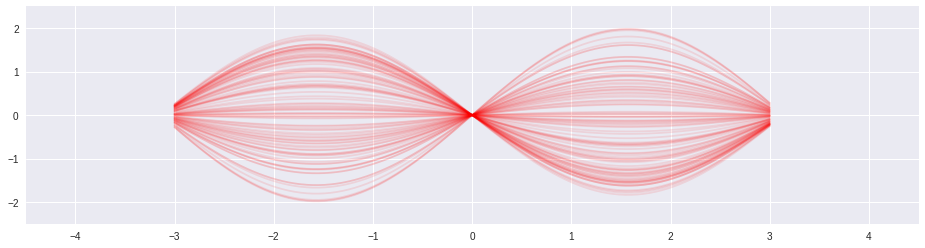

In [0]:
#@title Plot Training Datasets (Context and Target)
n_obs = 5
n_context = 5
xs = np.random.uniform(0, 3, n_obs)
amp = 1
ys = amp * np.sin(xs)
num_samples =100 #@param{type:'integer'}
x_star = np.linspace(-3, 3, 100)

fig, ax = plt.subplots(1, figsize=(16,4))
for i in range(num_samples):
    y_temp = train_amp[i]*np.sin(x_star+train_phase[i])
    ax.plot(x_star, y_temp, c='red', alpha=0.1)
ax.set_xlim((-4.5, 4.5))
ax.set_ylim((-2.5, 2.5))
plt.show()

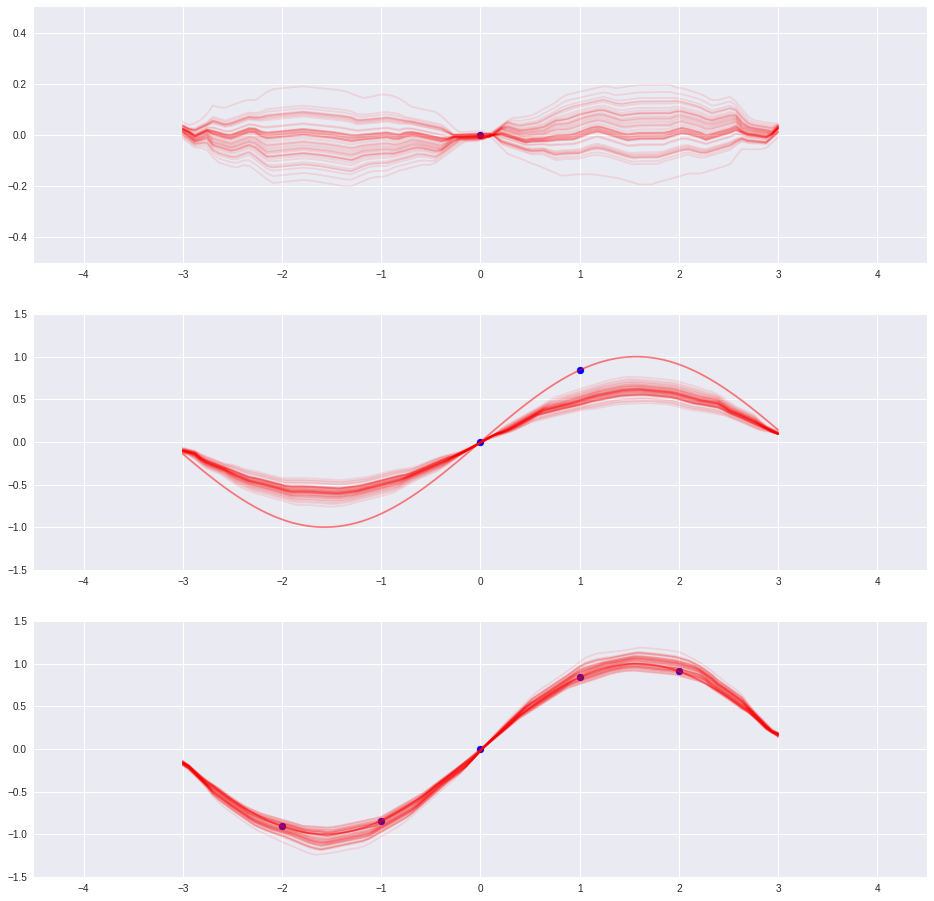

In [0]:
#@title Plot Predictions

AMPLITUDE = 1 #@param {type:"number"}
amp = AMPLITUDE
PHASE = 0 #@param {type:"number"}
phase = PHASE

#=========================================================
# PLOTTING PREDICTIONS

x_star = np.linspace(-3, 3, 100)
y_star = amp * np.sin(x_star+phase)

def plot_prediction(ax, xs, ys, x_star, y_star, plot_true = True, xlim = (-4.5, 4.5), ylim=(-1.5, 1.5)):
    posterior_predict_op = posterior_predict(
        xs.reshape((-1,1)), 
        ys.reshape((-1,1)), 
        x_star.reshape((-1,1)), 
        params, n_draws=50)
    y_star_mat = sess.run(posterior_predict_op.mu)

    for i in range(y_star_mat.shape[1]):
        ax.plot(x_star, y_star_mat.T[i], c='red', alpha=0.1)
    if plot_true:
        ax.plot(x_star, y_star, c='red', alpha=.5)
    ax.scatter(xs, ys, c='blue')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, axes = plt.subplots(3, 1, figsize=(16,16))
xss = [np.array(xs) for xs in [[0], [0, 1], [-2, -1, 0, 1, 2]]]
yss = [amp*np.sin(xs+phase) for xs in xss]
plot_true = False
ylim=(-0.5, 0.5)
for ax, xs, ys in zip(axes, xss, yss):
    plot_prediction(ax, xs, ys, x_star, y_star, plot_true = plot_true, ylim = ylim)
    plot_true = True
    ylim=(-1.5, 1.5)

In [0]:
#@title Train on Sine Data Generator

tf.reset_default_graph()
params = NeuralProcessParams(dim_r=2, dim_z=2, n_hidden_units_h=[8,8],
                             n_hidden_units_g=[32, 32, 32])
sess = tf.Session()

# Placeholders for training inputs
x_context = tf.placeholder(tf.float32, (None, 1))
y_context = tf.placeholder(tf.float32, (None, 1))
x_target = tf.placeholder(tf.float32, (None, 1))
y_target = tf.placeholder(tf.float32, (None, 1))

# Set up NN
train_op, loss = init_neural_process(x_context, y_context, x_target, y_target, params, learning_rate=0.001)

# Initialise
init = tf.global_variables_initializer()
sess.run(init)

n_iter = 200000 #@param{type:'integer'}
loss_freq = 1e4

train_xs = []
train_amp = []
train_ys = []
train_phase = []
VARIABLE_PHASE = True #@param {type:"boolean"}
for i in range(n_iter):
    n_obs = 20
    xs = np.random.uniform(-3, 3, n_obs)
    amp = random.uniform(-2, 2)
    if VARIABLE_PHASE:
      phase = random.uniform(0, np.pi)
    else:
      phase = 0
      
    ys = amp * np.sin(xs+phase)
    
    train_xs.append(xs)
    train_amp.append(amp)
    train_ys.append(ys)
    train_phase.append(phase)
    
    n_context = random.choice(range(1, 11))
    feed_dict = split_context_target(xs.reshape(-1, 1), ys.reshape(-1, 1), n_context, x_context, y_context, x_target, y_target)
    a = sess.run((train_op, loss), feed_dict=feed_dict)
    if i % loss_freq == 0:
        print("Loss: {:.3f}".format(a[1]))






Loss: 5022.810
Loss: 101.491
Loss: 48.068
Loss: 2103.321
Loss: 606.704
Loss: 440.700
Loss: 10.110
Loss: 3260.449
Loss: 307.783
Loss: 1686.800
Loss: 1329.662
Loss: 449.358
Loss: 3069.528
Loss: 3747.727
Loss: 132.879
Loss: 790.377
Loss: 108.332
Loss: 387.808
Loss: 313.484
Loss: -7.347


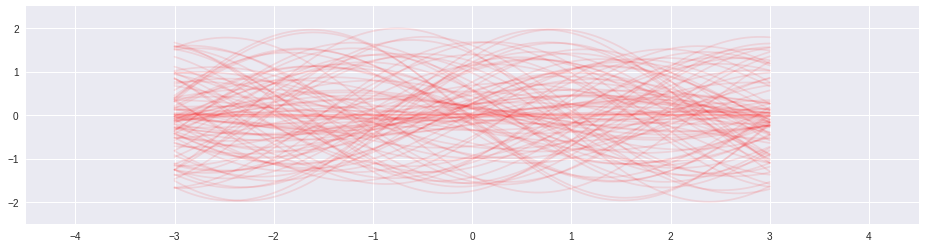

In [0]:

#@title Plot Training Datasets (Context and Target)
n_obs = 5
n_context = 5
xs = np.random.uniform(0, 3, n_obs)
amp = 1
ys = amp * np.sin(xs)
num_samples =100 #@param{type:'integer'}
x_star = np.linspace(-3, 3, 100)
y_star = amp * np.sin(x_star)

fig, ax = plt.subplots(1, figsize=(16,4))
for i in range(num_samples):
    y_temp = train_amp[i]*np.sin(x_star+train_phase[i])
    ax.plot(x_star, y_temp, c='red', alpha=0.1)
ax.set_xlim((-4.5, 4.5))
ax.set_ylim((-2.5, 2.5))
plt.show()

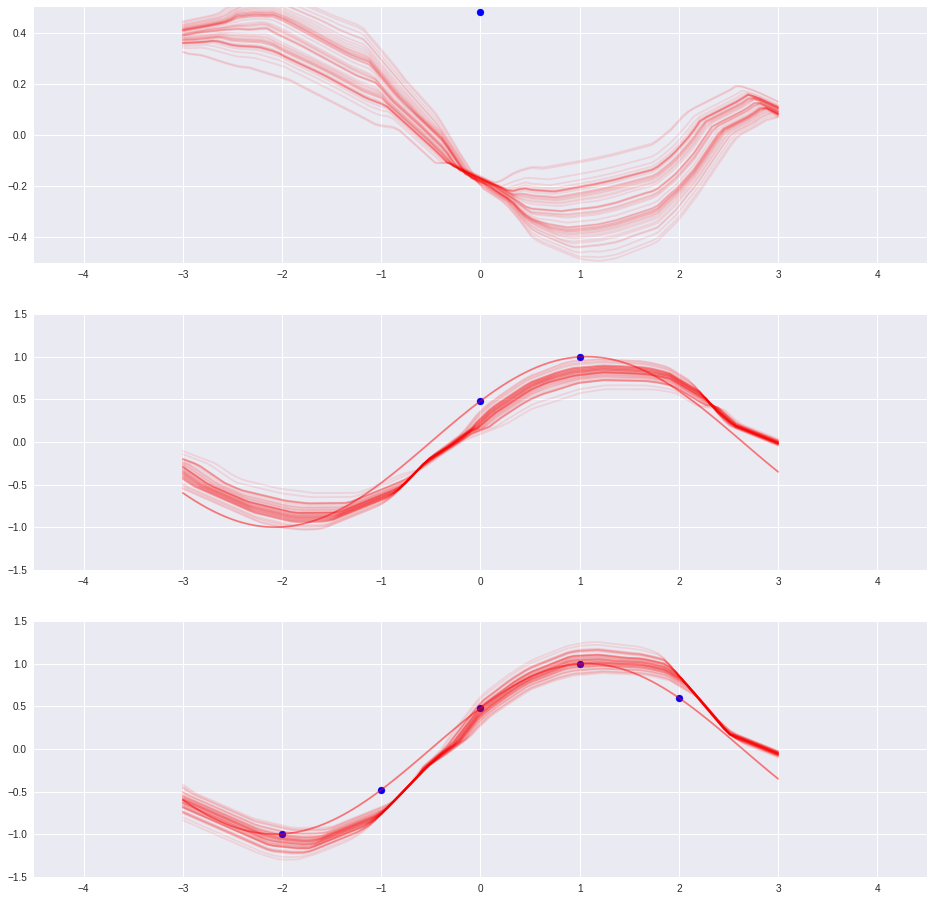

In [0]:
#@title Plot Predictions

AMPLITUDE = 1 #@param {type:"number"}
amp = AMPLITUDE
PHASE = 0.5 #@param {type:"number"}
phase = PHASE

#=========================================================
# PLOTTING PREDICTIONS

x_star = np.linspace(-3, 3, 100)
y_star = amp * np.sin(x_star+phase)

def plot_prediction(ax, xs, ys, x_star, y_star, plot_true = True, xlim = (-4.5, 4.5), ylim=(-1.5, 1.5)):
    posterior_predict_op = posterior_predict(
        xs.reshape((-1,1)), 
        ys.reshape((-1,1)), 
        x_star.reshape((-1,1)), 
        params, n_draws=50)
    y_star_mat = sess.run(posterior_predict_op.mu)

    for i in range(y_star_mat.shape[1]):
        ax.plot(x_star, y_star_mat.T[i], c='red', alpha=0.1)
    if plot_true:
        ax.plot(x_star, y_star, c='red', alpha=.5)
    ax.scatter(xs, ys, c='blue')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, axes = plt.subplots(3, 1, figsize=(16,16))
xss = [np.array(xs) for xs in [[0], [0, 1], [-2, -1, 0, 1, 2]]]
yss = [amp*np.sin(xs+phase) for xs in xss]
plot_true = False
ylim=(-0.5, 0.5)
for ax, xs, ys in zip(axes, xss, yss):
    plot_prediction(ax, xs, ys, x_star, y_star, plot_true = plot_true, ylim = ylim)
    plot_true = True
    ylim=(-1.5, 1.5)

### Gaussian Processes

In this experiment, we will test how NP can be used to learn the distribution of tasks, where each task is a function sampled from the same GP with a Matern52 kernel with variance 2, length scale 1.5.

We sampled 20 such functions and for each task we sample 3 points randomly from it. The aim of the this experiment is to see whether the NP trained along with these 20 tasks can learn the common structure underlying these tasks (the kernel).

Here are the 20 samples from a Gaussian Process


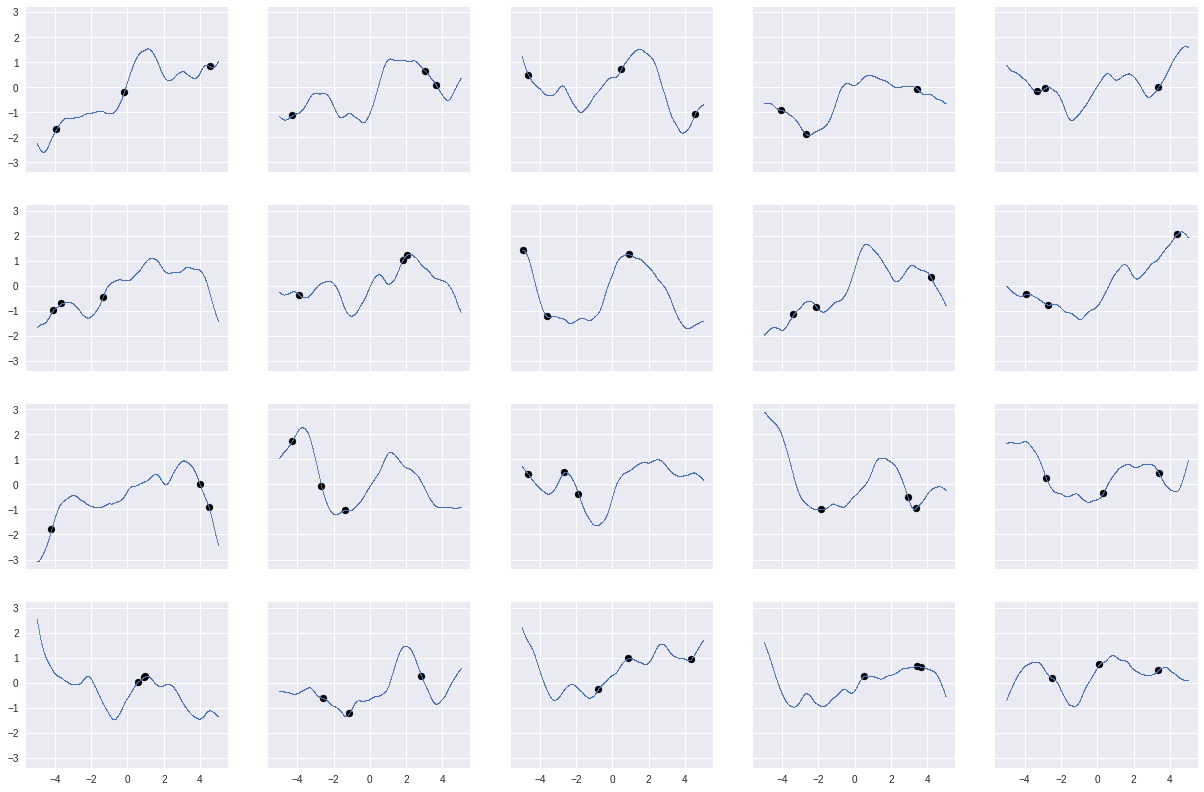

In [0]:
print("Here are the 20 samples from a Gaussian Process")
Image("../content/neural_processes/experiments/Alan/GP_exp1.png", width=1000)

We will be using a NP with the following setup,

* $h$, $g$ are both a 3 layer NN 
* The Z-encoder are both 1 layer NN

We willl also fit a Gaussian processes (with RBF + white noise kernel) to each of the separate tasks and compare to the NP. 

In [0]:
#@title Plot posterior samples
print("The red lines are samples from the posterior NP whereas grey curves are from a GP. \n")
print("The blue dashed line are the true underlying curve")

Image('../GP_exp2.png', width=1000)

The red lines are samples from the posterior NP whereas grey curves are from a GP. 

The blue dashed line are the true underlying curve


Having a look at task 14, we see how the NP did learn the intrinsic structural information across the tasks. 


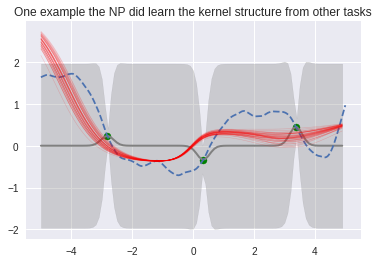

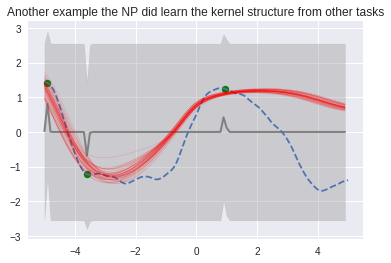

In [0]:
display(Image("../content/neural_processes/experiments/Alan/GP_exp3.png", height=300))
display(Image("../content/neural_processes/experiments/Alan/GP_exp4.png", height=300))

### Quadratic functions

The functions we consider in this section are of the form 
$$
f(x) = xQx^{T} + p
$$
and we take $x \in \mathbb{R}\;; Q, p \in \mathbb{R}, Q > 0$, resulting in convex parabolas. 

We generate observation sets to train the NP, by sampling $Q \sim \text{Unif}[5, 10], p \sim \text{Unif}[-2, 2]$, taking $x_i \sim \text{Unif}[-5, 5], i=1, ..., 100$, and forming $y_i  = f(x_i)$. To form the context set we sample $N$ randomly between 50 and 70. 

In [0]:
#@title Train on Quadratic Data Generator



#=========================================================
# INITIALISATION

# Initial setup
params = NeuralProcessParams(dim_r=2, dim_z=2, n_hidden_units_h=[64, 64], n_hidden_units_g=[64, 64, 64])

tf.reset_default_graph()
sess = tf.Session()

# Placeholders for training inputs
x_context = tf.placeholder(tf.float32, (None, 1))
y_context = tf.placeholder(tf.float32, (None, 1))
x_target = tf.placeholder(tf.float32, (None, 1))
y_target = tf.placeholder(tf.float32, (None, 1))

# Set up NN
train_op, loss = init_neural_process(x_context, y_context, x_target, y_target,
                                     params, learning_rate=0.001)

# Initialise
init = tf.global_variables_initializer()
sess.run(init)

n_iter = 200000 #@param {type:"integer"}
loss_freq = n_iter/10
n_obs = 100
q_low = 0.1
q_high = 10
p_low = -2
p_high = 2
x_range_low = -5
x_range_high = 5

#=========================================================
# TRAINING

train_xs = []
train_q = []
train_ys = []
train_p = []

for i in range(n_iter):
    xs = np.random.uniform(x_range_low, x_range_high, n_obs)
    q = random.uniform(q_low, q_high)
    p = random.uniform(p_low, p_high)
    ys = q * (xs)**2 + p

    train_xs.append(xs)
    train_q.append(q)
    train_p.append(p)
    train_ys.append(ys)

    n_context = random.choice(range(50,70))
    feed_dict = split_context_target(xs.reshape(-1, 1), ys.reshape(-1, 1), n_context, x_context, y_context, x_target,
                                     y_target)
    a = sess.run((train_op, loss), feed_dict=feed_dict)
    if i % loss_freq == 0:
        print("Loss: {:.3f}".format(a[1]))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Use tf.cast instead.
Loss: 123758632.000
Loss: 363860.844
Loss: 649040.375
Loss: 49209.500
Loss: 46057.359
Loss: 1543231.875
Loss: 8083.286
Loss: 31946.652
Loss: 22429.883
Loss: 6957.141


(-25, 50)

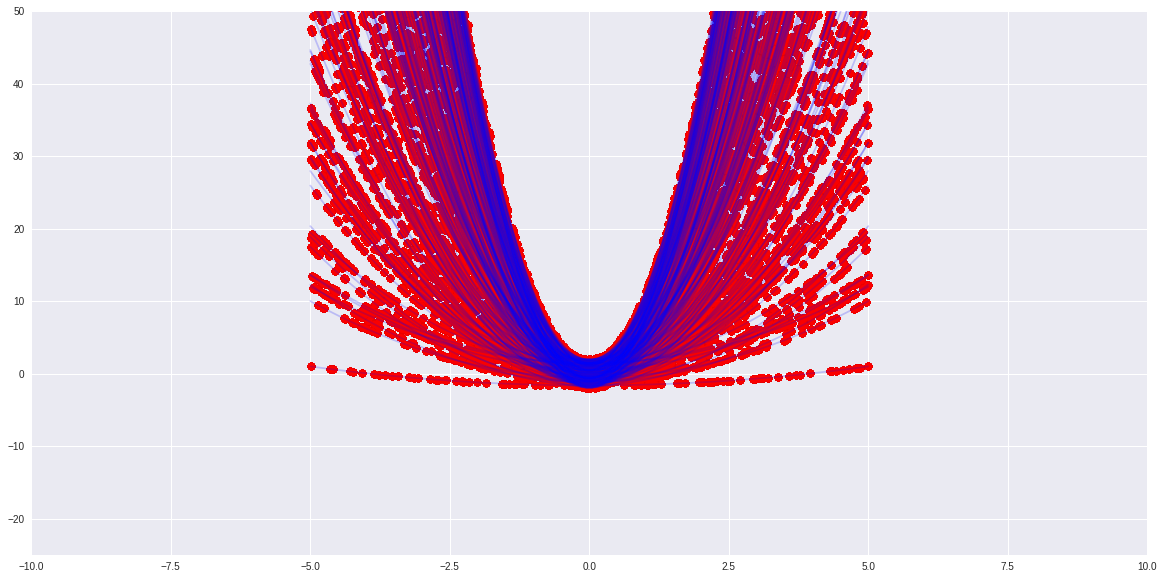

In [0]:
#@title Plot Training (Context and Target)
fig, ax = plt.subplots(1, figsize=(20,10))
n_samples = 100 #@param

n_samples = 200
x_star = np.linspace(-5, 5, 100)
for i in range(n_samples):
    y_temp = train_q[i]*x_star**2+train_p[i]
    ax.plot(x_star, y_temp, c='blue', alpha=0.2)
    ax.scatter(train_xs[:n_samples], train_ys[:n_samples], c='red', alpha=0.2)
ax.set_xlim((-10, 10))
ax.set_ylim((-25, 50))

The plot above shows the functions (in blue) and points (in red) that the NP was trained on. These appear to provide good coverage over the space with 200,000 iterations. 

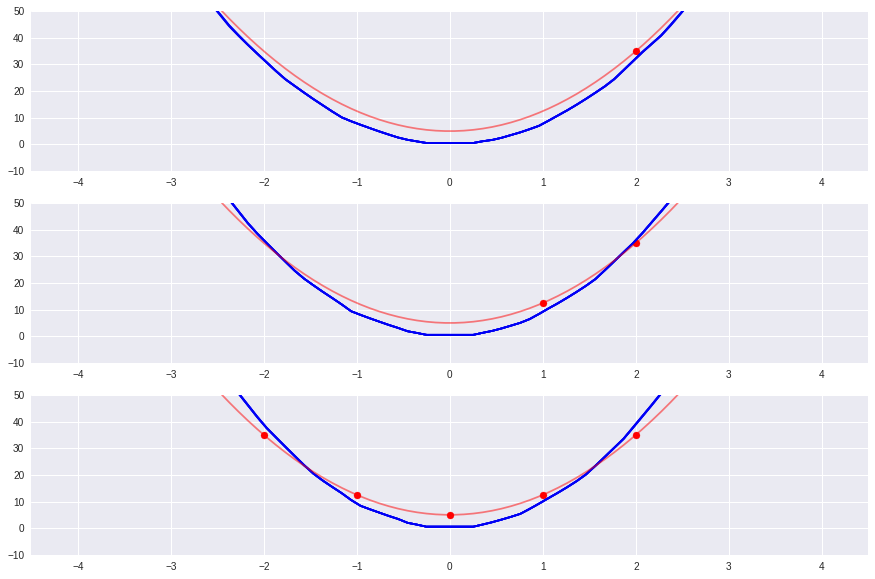

In [0]:
#@title Plot Predictions

X_SQUARED_COEFFICIENT = 7.5  #@param {type:"number"}
q_pred = X_SQUARED_COEFFICIENT
Y_INTERCEPT = 5 #@param {type:"number"}
p_pred = Y_INTERCEPT

#=========================================================
# PLOTTING PREDICTIONS

xs = np.random.uniform(x_range_low, x_range_high, 5)
ys = q_pred * (xs)**2 + p_pred
x_star = np.linspace(x_range_low, x_range_high, 100)
y_star = q_pred * (x_star)**2 + p_pred

def plot_prediction(ax, xs, ys, x_star, y_star, plot_true = True, xlim = (-4.5, 4.5), ylim=(-1.5, 1.5), sess= tf.get_default_session()):
    posterior_predict_op = posterior_predict(
        xs.reshape((-1,1)),
        ys.reshape((-1,1)),
        x_star.reshape((-1,1)),
        params, n_draws=50)
    y_star_mat = sess.run(posterior_predict_op.mu)

    for i in range(y_star_mat.shape[1]):
        ax.plot(x_star, y_star_mat.T[i], c='b', alpha=0.1)
    if plot_true:
        ax.plot(x_star, y_star, c='r', alpha=.5)
    ax.scatter(xs, ys, c='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, axes = plt.subplots(3, 1, figsize=(15,10))
xss = [np.array(xs) for xs in [[2], [1, 2], [-2, -1, 0, 1, 2]]]
yss = [q_pred * (xs)**2 + p_pred for xs in xss]
plot_true = False
ylim=(-10, 50)
plot_true = True
for ax, xs, ys in zip(axes, xss, yss):
    plot_prediction(ax, xs, ys, x_star, y_star, plot_true = plot_true, ylim = ylim, sess=sess)
    ylim=(-10, 50)
plt.show()


The plots show NP predictions as blue lines, and observed points as red dots. The top plot shows the results with just one observed point. It is notable that although the blue lines form a shape close to the true test function, the uncertainty quantification appears to be poor - there are a large number of possible curves given the observation, but this is not well demonstrated by the predictions. The second plot demonstrates a good fit when two observation points are given. In the bottom plot, the three points fully determine the test function; the NP predictions are very similar to the case with two observations. 

Varying the $Q$ and $p$ parameters in the test function outside of the range seen during training results in much worse accuracy of the predictions. It should also be noted that the results appear to vary greatly depending on the choice of the number of iterations, the number of observations used at each iteration, the dimension of $r$ and $z$ and the number of layers in the NNs $h$ and $g$. Unfortunate choices result in very inaccurate predictions, with the samples poorly resembling the test function; the NP requires careful tuning. 

### Polynomials

We build on the previous experiment and look at the performance of NPs in predicting polynomial functions of the form
$f(x) = \beta_0 + \beta_1  x + \beta_2 x^2 + \beta_3 x^3$
where each $\beta_p$ is 0 with probability $\phi$, and $\mathcal{N}(0, I)$ with probability $(1-\phi)$.  Therefore the family of functions is quite vast, including linear, quadratic and cubic functions.

The model was trained using a separate [NP implementation](https://github.com/JTT94/neural_processes/blob/master/experiments/valerie/NeuralProcess_vb.ipynb) (also based largely on [Kaspar Martens' tutorial](https://kasparmartens.rbind.io/post/np/) and [Sander van Dijk's Python implementation](https://github.com/sgvandijk/neural-processes)).

#### Model parameters
The NP was trained with $r$ and $z$ each of dimension 4. The encoder $h$ ($(x_i, y_i) \rightarrow r_i$) had 3 hidden layers with 64, 32 and 32 neurons, respectively.  The decoder $g$ ($(x^*, z) \rightarrow y^*$) had 3 hidden layers of 32, 64 and 32 neurons, respectively.   On each of 200k iterations:


1.   Sample $x_i \sim \mathcal{U}(-3,3)$ iid for $i=1,\dots,50$
2.   Sample $$\beta_p \sim 
\begin{cases}
\mathcal{N}(0,1) \qquad \text{with prob } (1-\phi)\\\
0\qquad\qquad \text{with prob } \phi
\end{cases}
$$ iid for $p=0,\dots,3$
3.   Calculate $y = f(x)$ using sampled $\mathbf{x}$ and $\beta_p$s
4.   Select number of context points uniformly from $[1,25]$ and randomly allocate $(x_i,y_i)$ pairs to context or target sets
5.   Perform optimization step, minimizing ELBO


#### Results
The plot below shows 25 draws from the posterior distribution (in blue) fit using 5, 25, 50 or 100 context points.  The context points are shown in orange.  

In [0]:
display(Image("../content/neural_processes/experiments/valerie/poly_family.png", height=300))

## MAML vs Conditional Neural Processes (CNP)

In [0]:
#@title CNP-MAML
import tensorflow as tf
from src.conditional_neural_process.gp_data_generator import GPCurvesReader
from src.conditional_neural_process.model import DeterministicModel

# Config
#------------------------------------------------------------
TRAINING_ITERATIONS = int(1000) #@param
MAX_CONTEXT_POINTS = 10
PLOT_AFTER = int(2e4)
tf.reset_default_graph()

# Data
#------------------------------------------------------------
# Train dataset
dataset_train = GPCurvesReader(
    batch_size=64, max_num_context=MAX_CONTEXT_POINTS)
data_train = dataset_train.generate_curves()

# Test dataset
dataset_test = GPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate_curves()


dataset_train_task_level = GPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS)
data_task_train = dataset_train.generate_curves()

# Test dataset
dataset_test = GPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate_curves()

# Model
#------------------------------------------------------------
# Sizes of the layers of the MLPs for the encoder and decoder
# The final output layer of the decoder outputs two values, one for the mean and
# one for the variance of the prediction at the target location
encoder_output_sizes = [128, 128, 128, 128]
decoder_output_sizes = [128, 128, 2]

# Define the model
def loss_fn(context_x, context_y, target_x, target_y, encoder_weights, decoder_weights):
  # Pass query through the encoder and the decoder
  representation = model.encoder(context_x, context_y, data_task_train.num_context_points, weights=encoder_weights)
  dist, mu, sigma = model.decoder(representation, target_x, data_task_train.num_total_points, weights=decoder_weights)

  log_p = dist.log_prob(target_y)
  loss = -tf.reduce_mean(log_p)
  return loss

def update_weights(loss, weights, update_lr = 0.2):
  grads = tf.gradients(loss, list(weights.values()))
  gradients = dict(zip(weights.keys(), grads))
  fast_weights = dict(zip(weights.keys(), [weights[key] - update_lr*gradients[key] for key in weights.keys()]))
  return fast_weights

model = DeterministicModel(encoder_output_sizes, decoder_output_sizes)
# Hack to initialise weights
_, _, _ = model(data_train.query, data_train.num_total_points,
                       data_train.num_context_points, data_train.target_y)

lossesb = []
batch_size = 10
encoder_weights = model.encoder.weights
decoder_weights = model.decoder.weights
for i in range(batch_size):
  (context_x, context_y), target_x = data_task_train.query
  target_y = data_task_train.target_y

  lossa = loss_fn(context_x, context_y, target_x, target_y, encoder_weights, decoder_weights)

  new_encoder_weights = update_weights(lossa, encoder_weights, update_lr = 0.2)
  new_decoder_weights = update_weights(lossa, decoder_weights, update_lr = 0.2)

  (context_xb, context_yb), target_xb = data_task_train.query
  target_yb = data_task_train.target_y
  lossb = loss_fn(context_xb, context_yb, target_xb, target_yb, new_encoder_weights, new_decoder_weights)
  lossesb.append(lossb)



total_loss_b = tf.reduce_sum(lossesb)
optimizer = tf.train.AdamOptimizer(0.2)
gvs = optimizer.compute_gradients(total_loss_b)
metatrain_op = optimizer.apply_gradients(gvs)


# Training loop
#------------------------------------------------------------

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
preds = []
xs = []
ys =[]
for it in range(TRAINING_ITERATIONS):
  sess.run([metatrain_op])
  print(it)


Iteration: 0, Loss: 36.017547607421875
Iteration: 100, Loss: 14.359838485717773
Iteration: 200, Loss: 14.642071723937988
Iteration: 300, Loss: 14.413190841674805
Iteration: 400, Loss: 13.778609275817871
Iteration: 500, Loss: 15.035362243652344
Iteration: 600, Loss: 14.561006546020508
Iteration: 700, Loss: 14.318979263305664
Iteration: 800, Loss: 14.168622970581055
Iteration: 900, Loss: 13.963693618774414


# Discussion

We used Neural Processes to perform regression tasks on a variety of function distributions including sine curves, functions drawn from Gaussian Processes, quadratic functions and even a large family of polynomial functions.

In all of our experiments, we observed high sensitivity of the NP to the underlying neural network architecture, including the number of hidden layers in the encoder and decoder and the number of neurons in each, and the dimensions of latent variables $r$ and $z$.  Additionally, all of our underlying neural networks relied primarily on ReLU layers, which we think led to the insufficiently smooth predictions, particularly when the NPs were not trained with enough iterations.  

Despire the

# References



* Finn, Chelsea, Pieter Abbeel, and Sergey Levine. "[Model-agnostic meta-learning for fast adaptation of deep networks.](https://arxiv.org/abs/1703.03400)" Proceedings of the 34th International Conference on Machine Learning-Volume 70. JMLR. org, 2017. 
*   Garnelo, Marta, et al. "[Neural processes](https://arxiv.org/abs/1807.01622)." arXiv preprint arXiv:1807.01622 (2018)
*   Garnelo, Marta, et al. "[Conditional neural processes](https://arxiv.org/abs/1807.01613)." arXiv preprint arXiv:1807.01613 (2018).
*   Kim, Hyunjik, et al. "[Attentive Neural Processes](https://arxiv.org/abs/1901.05761)." arXiv preprint arXiv:1901.05761 (2019).
*   Martens, Kaspar.  "Neural Processes as distributions over functions." 10 Aug 2018. [kasparmartens.rbind.io/post/np/](https://kasparmartens.rbind.io/post/np/).
*   Van Dijk, S. "neural-processes." 10 Nov 2018. GiitHub Repository. [https://github.com/sgvandijk/neural-processes](https://github.com/sgvandijk/neural-processes).


